# Trader Performance vs Market Sentiment Analysis
### Primetrade.ai – Round 0 Assignment



## 1. Data Loading

This analysis uses two datasets:
1. Bitcoin Fear & Greed Index representing daily market sentiment
2. Hyperliquid historical trader data containing trade-level information

Malformed CSV rows were handled and datasets were successfully loaded for analysis.



In [28]:
import pandas as pd
import matplotlib.pyplot as plt


sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv", on_bad_lines="skip")

print("Files loaded successfully")


Files loaded successfully 


/tmp/ipython-input-133818847.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv", on_bad_lines="skip")


In [7]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.003055,1.050000e+15,1.730000e+12


## 2. Data Preparation

The sentiment dataset was reduced to relevant fields and trader timestamps were converted to daily format.
Both datasets were merged on the date column, and rows with missing sentiment labels were removed.




In [11]:
sentiment = sentiment[["date", "classification"]]
sentiment["date"] = pd.to_datetime(sentiment["date"])
sentiment.head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [46]:
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], dayfirst=True, errors="coerce")
trades = trades.dropna(subset=["Timestamp IST"])

trades["date"] = trades["Timestamp IST"].dt.date
trades["date"] = pd.to_datetime(trades["date"])

trades.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,TRUE,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [19]:
merged = pd.merge(trades, sentiment, on="date", how="left")
merged["classification"].isnull().sum()



np.int64(6)

In [21]:
merged = merged.dropna(subset=["classification"])
merged["classification"].isnull().sum()


np.int64(0)

## 3. Key Metrics Created

The following metrics were constructed:
- Daily PnL
- Trade frequency per day
- Long vs Short ratio
- Trader segmentation based on activity level


In [22]:
merged["Closed PnL"] = pd.to_numeric(merged["Closed PnL"], errors="coerce")


In [24]:
daily_pnl = merged.groupby(["date", "classification"])["Closed PnL"].sum().reset_index()
daily_pnl.head()


,date,classification,Closed PnL
0,2023-05-01,Greed,0.000000
1,2023-12-05,Extreme Greed,0.000000
2,2023-12-14,Greed,-205.434737
3,2023-12-15,Greed,-24.632034
4,2023-12-16,Greed,0.000000


In [26]:
daily_pnl.groupby("classification")["Closed PnL"].mean()


,Closed PnL
classification,
Extreme Fear,61360.998112
Extreme Greed,24807.592616
Fear,48202.123261
Greed,14082.555538
Neutral,23650.492579


## 4. Analysis & Insights

### Performance vs Market Sentiment

Daily profitability was compared across sentiment regimes to understand performance differences.


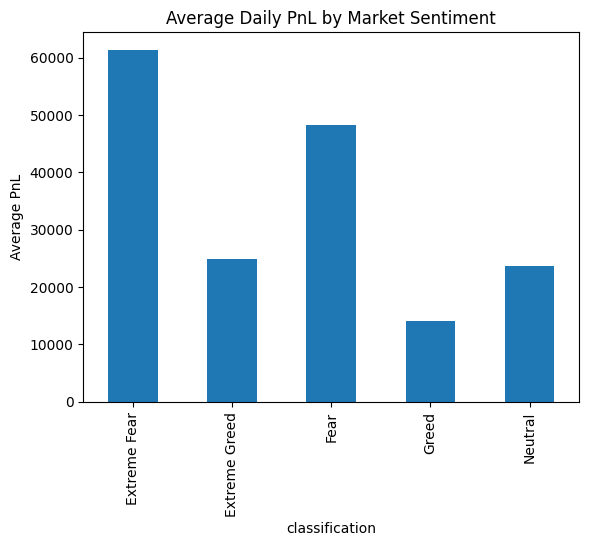

In [29]:
daily_pnl.groupby("classification")["Closed PnL"].mean().plot(kind="bar")
plt.title("Average Daily PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.show()


### Trade Frequency vs Market Sentiment

Trading activity was analyzed by measuring the number of trades executed per day under each sentiment regime.


In [31]:
trade_count = merged.groupby(["date", "classification"]).size().reset_index(name="trade_count")
trade_count.head()


,date,classification,trade_count
0,2023-05-01,Greed,3
1,2023-12-05,Extreme Greed,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3


In [32]:
trade_count.groupby("classification")["trade_count"].mean()


,trade_count
classification,
Extreme Fear,1545.142857
Extreme Greed,364.008772
Fear,706.010989
Greed,274.715026
Neutral,598.880597


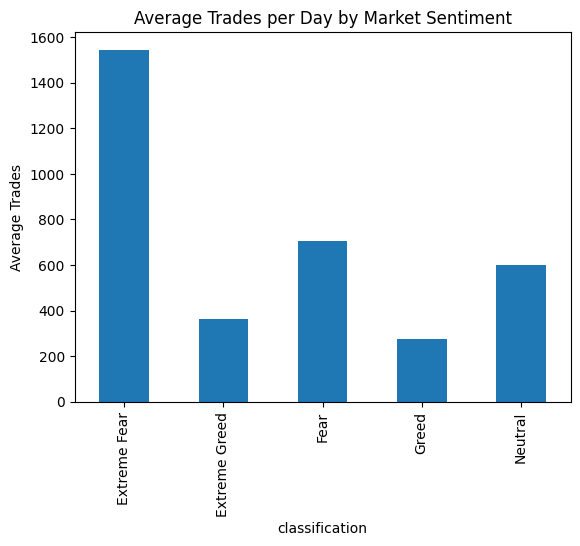

In [33]:
trade_count.groupby("classification")["trade_count"].mean().plot(kind="bar")
plt.title("Average Trades per Day by Market Sentiment")
plt.ylabel("Average Trades")
plt.show()


### Long vs Short Behaviour

Positioning bias was evaluated by comparing buy and sell trade distribution across sentiment regimes.


In [34]:
long_short = merged.groupby(["classification", "Side"]).size().unstack()
long_short


Side,BUY,SELL
classification,,
Extreme Fear,11079,10553
Extreme Greed,18506,22991
Fear,31568,32679
Greed,25579,27441
Neutral,20229,19896


In [35]:
long_short_ratio = long_short.div(long_short.sum(axis=1), axis=0)
long_short_ratio


Side,BUY,SELL
classification,,
Extreme Fear,0.512158,0.487842
Extreme Greed,0.445960,0.554040
Fear,0.491354,0.508646
Greed,0.482441,0.517559
Neutral,0.504150,0.495850


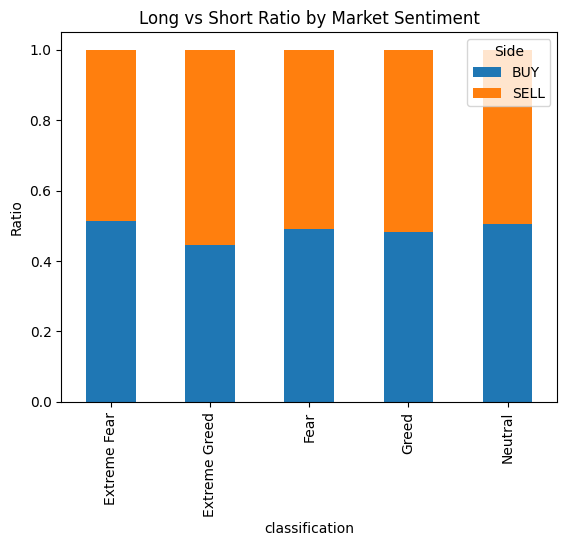

In [36]:
long_short_ratio.plot(kind="bar", stacked=True)
plt.title("Long vs Short Ratio by Market Sentiment")
plt.ylabel("Ratio")
plt.show()


In [37]:
long_short_ratio


Side,BUY,SELL
classification,,
Extreme Fear,0.512158,0.487842
Extreme Greed,0.445960,0.554040
Fear,0.491354,0.508646
Greed,0.482441,0.517559
Neutral,0.504150,0.495850


### Trader Segmentation

Traders were segmented into Frequent and Infrequent groups based on activity levels to compare performance differences.


In [38]:
trader_activity = merged.groupby("Account").size().reset_index(name="trade_count")
trader_activity.head()


,Account,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,7636
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
2,0x271b280974205ca63b716753467d5a371de622ab,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239


In [39]:
threshold = trader_activity["trade_count"].median()

trader_activity["segment"] = trader_activity["trade_count"].apply(
    lambda x: "Frequent" if x > threshold else "Infrequent"
)


In [42]:
merged = merged.merge(trader_activity[["Account", "segment"]], on="Account", how="left")


In [43]:
merged["segment"].value_counts()


,count
segment,
Frequent,193125
Infrequent,27396


In [44]:
segment_pnl = merged.groupby("segment")["Closed PnL"].mean()
segment_pnl


,Closed PnL
segment,
Frequent,50.668964
Infrequent,94.560711


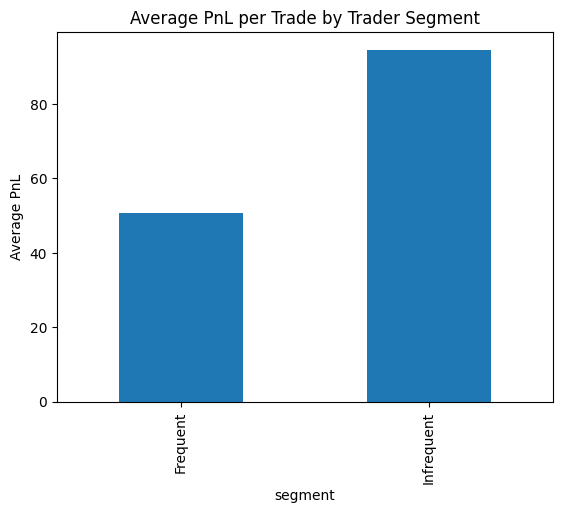

In [45]:
segment_pnl.plot(kind="bar")
plt.title("Average PnL per Trade by Trader Segment")
plt.ylabel("Average PnL")
plt.show()


## 5. Strategy Recommendations

- Fear-driven markets present stronger trading opportunities
- Avoid excessive trade frequency to improve per-trade profitability
- Dip-buying strategies may be effective during Extreme Fear periods


## Bonus: Predictive Model

A simple Random Forest model was trained to predict whether daily trader profitability would be positive or negative based on sentiment classification.


In [47]:
daily_pnl["target"] = (daily_pnl["Closed PnL"] > 0).astype(int)


In [48]:
daily_pnl["classification"] = daily_pnl["classification"].astype("category").cat.codes


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = daily_pnl[["classification"]]
y = daily_pnl["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.71875
